### 1. 텐서플로 불러오기

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In C:\Users\sanghyun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sanghyun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sanghyun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\sanghyun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sanghyun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.5.0'

In [3]:
keras.__version__

'2.5.0'

### 2. 시퀸셜 API를 사용하여 이미지 분류기 만들기

- 케라스를 사용하여 데이터셋 적재하기

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()

28x28크기의 배열이며 픽셀 강도가 0에서 225까지의 정수로 표현되어 있다.

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

- 픽셀 강도를 225.0으로 나누어 0-1 범위로 조정

In [8]:
X_valid,X_train = X_train_full[:5000]/ 255.0, X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [9]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

- 시퀸셜 API를 사용하여 모델 만들기

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

첫 번째 라인은 Sequential 모델을 만든다. 이 모델은 가장 간단한 케라스의 신경망 모델이다.  
순서대로 연결된 층을 일렬로 쌓아서 구성한다. 이를 시퀀셜 API라고 부른다.
그 다음 첫번째 층을 만들고 모델에 추가한다. Flatten 층은 입력 이미지를 1D 배열로 변환한다. 즉, 입력 데이터 X를 받으면  
X.reshpe(-1,1)를 계산한다. 이 층은 어떤 모델 파라미터도 가지지 않고 간단한 전처리를 수행한다. 모델의 첫 번째 층이므로 input_shape
를 지정해야한다. 여기에는 배치 크기를 제외하고 샘플의 크기만 써야 한다.  
또는 첫 번째 층으로 input_shape=[28,28]로 지정된 keras.layers.InputLayer층을 추가할 수도 있다.
그다음 뉴런 300개를 가진 Dens 은닉층을 추가한다. 이 층은 ReLU 활성화 함수를 사용한다. Dens 층마다 각자 가중치 행렬을 관리한다.  
이 행렬에는 층의 뉴런과 입력 사이의 모든 연결 가중치가 포함된다. 또한 편향도 백터로 관리한다.
다음으로 뉴런 100개 dense 은닉층, 뉴런 10개 dense 은닉층을 쓰고 베타적인 클래스 이므로 마지막에 소프트맥스 활성화 함수를 사용한다.

- 앞에서와 같이 층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 리스트를 전달할 수 있다.

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

모델의 summary() 메서드는 모델엥 있는 모든 층을 출력한다. 각 층의 이름, 출력 크기, 파라미터 개수가 함께 출력된다. 마지막에  
훈련되는 파라미터와 훈련되지 않는 파라미터를 포함하여 전체 파라미터 개수를 출력한다.

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Dense층은 보통 많은 파라미터를 가진다. 예를들어 첫번째 은닉층은 784 X 300개의 연결 가중치와 300개의 편향을 가진다.  
이를 더하면 무려 파라미터가 235,500개나 된다. 이런 모델은 훈련 데이터를 학습하기 충분한 유연성을 가진다.  
또한 과대적합의 위험을 갖는다는 의미이기도 하다. 특히 훈련 데이터가 많지 않을 경우에 그렇다.

- 모델에 있는 층의 리스트를 출력하거나 인덱스로 층을 쉽게 선택할 수 있다. 또는 이름으로 층을 선택할 수도 있다.

In [14]:
model.layers

In [15]:
hidden1= model.layers[1]
hidden1.name

'dense_3'

In [16]:
model.get_layer('dense_5') is hidden1

False

층의 모든 파라미터는 get_weights() 메서드와 set_weights()메서드를 사용해 접근할 수 있다.  
Dense 층의 경우 연결 가중치와 편향이 모두 포함되어 있다.

In [17]:
weights,biases= hidden1.get_weights()

In [18]:
weights

array([[ 0.05767363,  0.07381484, -0.0444315 , ...,  0.01390456,
        -0.04386969,  0.02065478],
       [ 0.00649741,  0.01019487, -0.06640051, ..., -0.00111903,
        -0.02720308, -0.00636479],
       [ 0.03131815, -0.00643685,  0.07171658, ...,  0.05239108,
         0.06649753,  0.02133023],
       ...,
       [-0.00091281,  0.06080045,  0.07145076, ..., -0.00255322,
        -0.0432874 ,  0.05568323],
       [ 0.024824  ,  0.01373447, -0.04814311, ..., -0.06907514,
         0.0033446 ,  0.01228107],
       [ 0.07073277,  0.05464575, -0.01048271, ..., -0.00842787,
        -0.00079782, -0.00253378]], dtype=float32)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

- 모델 컴파일

모델을 만들고 나서 compile() 메서드를 호출하여 사용할 손실 함수와 옵티마이저를 지정해야 한다.  
부가적으로 훈련과 평가 시에 계산할 지표를 추가로 지정할 수 있다.

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

1. sparse_categorical_crossentropy

다중 분류 손실 함수  
integer type 클래스 -> one-hot encoding하지 않고 정수 형태로 label(y)을 넣어줌   
한 샘플에 여러 클래스가 있거나 label이 soft 확률일 경우 사용  

#### <참고>  
2. categorical_crossentropy

다중 분류 손실 함수  
출력 값이 one-hot encoding된 결과로 나온다. -> label(y)을 one-hot encoding해서 넣어줘야 함  
클래스가 상호 배타적일 경우(e.g. 각 샘플이 정확히 하나의 클래스에 속하는 경우) 사용  

3. binary_crossentropy

binary 다중 분류 손실 함수  
label들이 독립적일 때 사용  

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1714/1719 [============================>.] - ETA: 0s - loss: 0.7200 - accuracy: 0.7648WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F5F20F05E8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

훈련세트와 검증 세트에 대한 손실과 정확도를 출력한다. 훈련 손실이 감소(51%->31%)하므로 좋은 신호이다.  
훈련정확도와 검증정확도의 차이가 크지 않기 때문에 과대적합이 많이 일어나지 않은 것 같다.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

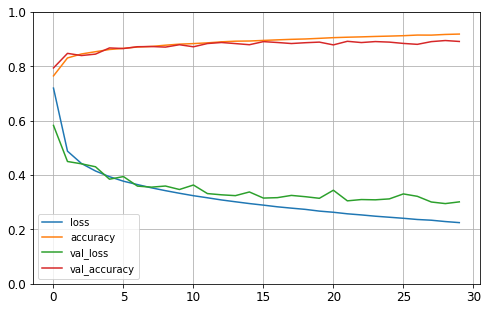

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # 수직충의 범위를 [0-1] 사이로 설정한다.
plt.show()

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.8814


[0.32765713334083557, 0.8813999891281128]

테스트 세트에서 하이퍼 파라미터를 튜닝하면 안된다. 그럴경우 일반화 오차를 매우 낙관적으로 추정하게 된다.

- 모델을 사용해 예측을 만들기  
    그 다음 모델의 predict() 메서드를 사용해 새로운 샘플에 대해 예측을 만들 수 있다.   
    여기서는 실제로 새로운 샘플이 없기 때문에 테스트 세트의 처음 3개 샘플을 사용하겠다.  

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

여기서 볼 수 있듯이 각 샘플에 대해 0에서 9까지 클래스마다 각각의 확률을 모델이 추정했다.  
예를 들어 첫 번째 이미지에 대해서는 클래스 9(앵클부츠)의 확률을 97%, 클래스 5(샌들)의 확률을 0.01%, 클래스 7(스니커즈)의 확률을  
0.01%로 추정했다.  
가장 높은 확률을 가진 클래스에만 관심이 있다면 predict_classes() 메서드를 사용할 수 있다.  

In [27]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### 3.시퀸셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

캘리포니아 주택 가격 데이터셋으로 바꾸어 회귀 신경망으로 이를 해결해 보겠다.

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history= model.fit(X_train,y_train,epochs=20,
                  validation_data=(X_valid,y_valid))
mse_test= model.evaluate(X_test,y_test)
X_new= X_test[:3] # 새로운 샘플로 취급한다.
y_pred = model.predict(X_new)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
355/363 [============================>.] - ETA: 0s - loss: 0.9890WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F60B7CC8B8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu